In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
holidays_events = pd.read_csv('/content/drive/MyDrive/sales_timeseries/store-sales-time-series-forecasting/holidays_events.csv')
oil = pd.read_csv('/content/drive/MyDrive/sales_timeseries/store-sales-time-series-forecasting/oil.csv')
stores = pd.read_csv('/content/drive/MyDrive/sales_timeseries/store-sales-time-series-forecasting/stores.csv')
train = pd.read_csv('/content/drive/MyDrive/sales_timeseries/store-sales-time-series-forecasting/train.csv')
test = pd.read_csv('/content/drive/MyDrive/sales_timeseries/store-sales-time-series-forecasting/test.csv')
transactions = pd.read_csv('/content/drive/MyDrive/sales_timeseries/store-sales-time-series-forecasting/transactions.csv')

sample_submission = pd.read_csv('/content/drive/MyDrive/sales_timeseries/store-sales-time-series-forecasting/sample_submission.csv')

##### List out feature names of each dataset

In [ ]:
holidays_events.columns


Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

In [ ]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
oil.columns

Index(['date', 'dcoilwtico'], dtype='object')

In [ ]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
stores.columns

Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')

In [ ]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [ ]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
test.columns

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion'], dtype='object')

In [ ]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
transactions.columns

Index(['date', 'store_nbr', 'transactions'], dtype='object')

## File Descriptions and Data Field Information
##### train.csv
- The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
- store_nbr identifies the store at which the products are sold.
- family identifies the type of product sold.
- sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
- onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.
##### test.csv
- The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
- The dates in the test data are for the 15 days after the last date in the training data.
##### sample_submission.csv
- A sample submission file in the correct format.
##### stores.csv
- Store metadata, including city, state, type, and cluster.
- cluster is a grouping of similar stores.
##### oil.csv
- Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)
##### holidays_events.csv
- Holidays and Events, with metadata
- NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
- Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).
##### Additional Notes
- Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
- A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [ ]:
train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [ ]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [ ]:
print('Diamensions of train data : {}'.format(train.shape))
print('Diamensions of test data : {}'.format(test.shape))

Diamensions of train data : (3000888, 6)
Diamensions of test data : (28512, 5)


In [ ]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [ ]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
train.corr()

,id,store_nbr,sales,onpromotion
id,1.000000,0.000301,0.085784,0.206260
store_nbr,0.000301,1.000000,0.041196,0.007286
sales,0.085784,0.041196,1.000000,0.427923
onpromotion,0.206260,0.007286,0.427923,1.000000


###### The dependant data to be predicted is the sales feature.

In [ ]:
train['sales'].unique()

array([0.000000e+00, 2.000000e+00, 8.100000e+02, ..., 4.381330e+02,
       1.545530e+02, 2.419729e+03])

In [ ]:
train['sales'].value_counts()

0.000       939130
1.000       115291
2.000        85959
3.000        68575
4.000        57846
             ...  
116.541          1
363.533          1
141.322          1
409.879          1
2419.729         1
Name: sales, Length: 379610, dtype: int64

In [ ]:
store_sales = train.copy()
#store_sales = store_sales.set_index('date').to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)

store_sales

,,,id,date,sales,onpromotion
,store_nbr,family,,,,
0,1,AUTOMOTIVE,0,2013-01-01,0.000,0
1,1,BABY CARE,1,2013-01-01,0.000,0
2,1,BEAUTY,2,2013-01-01,0.000,0
3,1,BEVERAGES,3,2013-01-01,0.000,0
4,1,BOOKS,4,2013-01-01,0.000,0
...,...,...,...,...,...,...
3000883,9,POULTRY,3000883,2017-08-15,438.133,0
3000884,9,PREPARED FOODS,3000884,2017-08-15,154.553,1
3000885,9,PRODUCE,3000885,2017-08-15,2419.729,148


In [ ]:
average_sales = store_sales.groupby('date').mean()['sales']

average_sales

date
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
2013-01-04    198.911154
2013-01-05    267.873244
                 ...    
2017-08-11    463.733851
2017-08-12    444.798280
2017-08-13    485.768618
2017-08-14    427.004717
2017-08-15    427.980884
Name: sales, Length: 1684, dtype: float64

##  Linear Regression Model with a time-step feature
on the series of average product sales. The target is in a column called 'sales'.

In [ ]:
avg_sales_df = average_sales.to_frame()

# Create a time dummy
time = np.arange(len(avg_sales_df.index)) # array([ 0, 1, 2, ..., 1681, 1682, 1683])

avg_sales_df['time'] = time 

# Create training data
X = avg_sales_df.loc[:, ['time']]  # features (dataframe)
y = avg_sales_df.loc[:, 'sales'] # target (series)

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

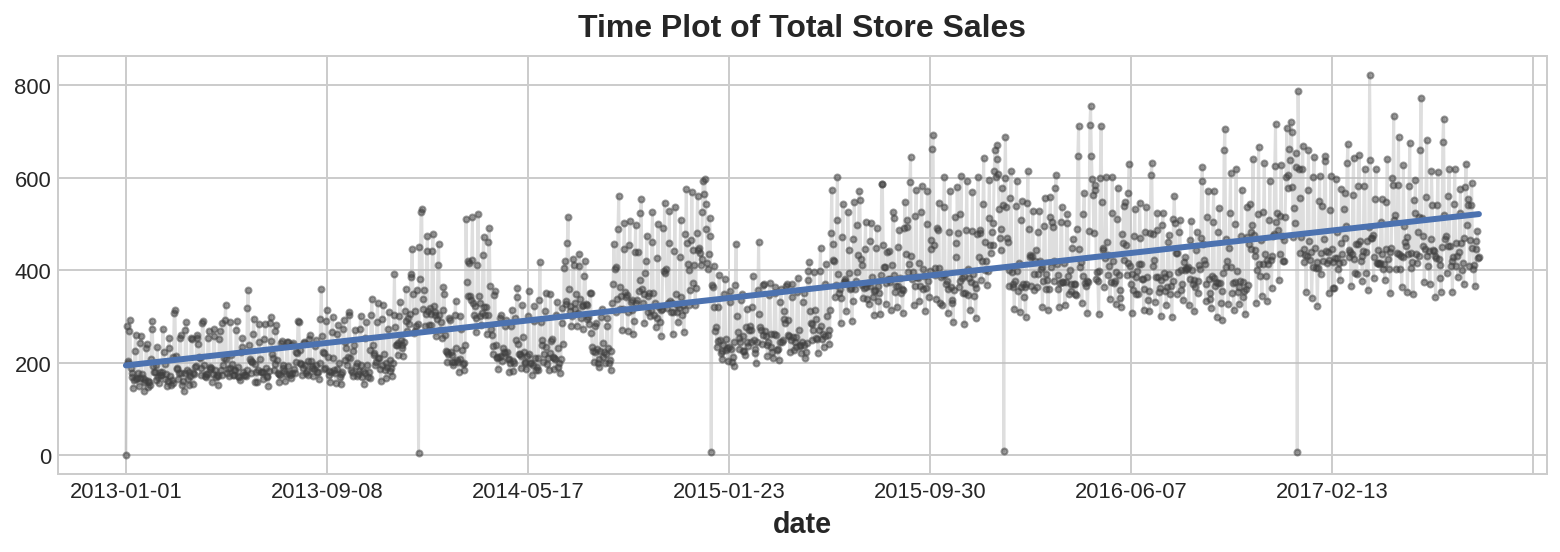

In [ ]:
ax = y.plot(**plot_params, alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Store Sales');

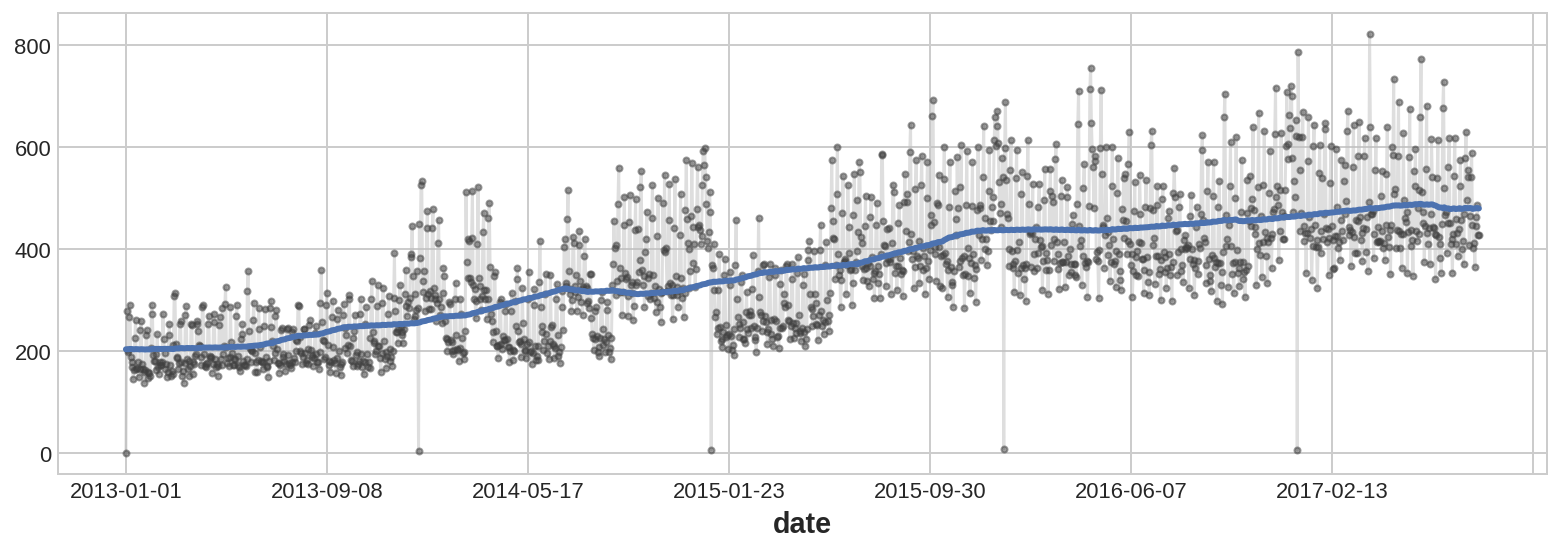

In [ ]:
#To see what kind of trend a time series might have, we can use a moving average plot. 
#The idea is to smooth out any short-term fluctuations in the series so that only long-term changes remain.
trend = average_sales.rolling(
    window=365,
    center=True,
    min_periods=183,
).mean()

ax = average_sales.plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)

In [ ]:
from statsmodels.tsa.deterministic import DeterministicProcess

y = average_sales.copy()  # the target

dp = DeterministicProcess(
        index=average_sales.index,
        constant=False,
        order=3,
        drop=True
)

# Create the feature set for the dates given in y.index
X = dp.in_sample()

# Create features for a 90-day forecast.
X_fore = dp.out_of_sample(steps=90)

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

X_fore.tail()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


,trend,trend_squared,trend_cubed
1770,1770.0,3132900.0,5.545233e+09
1771,1771.0,3136441.0,5.554637e+09
1772,1772.0,3139984.0,5.564052e+09
1773,1773.0,3143529.0,5.573477e+09
1774,1774.0,3147076.0,5.582913e+09


In [ ]:
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

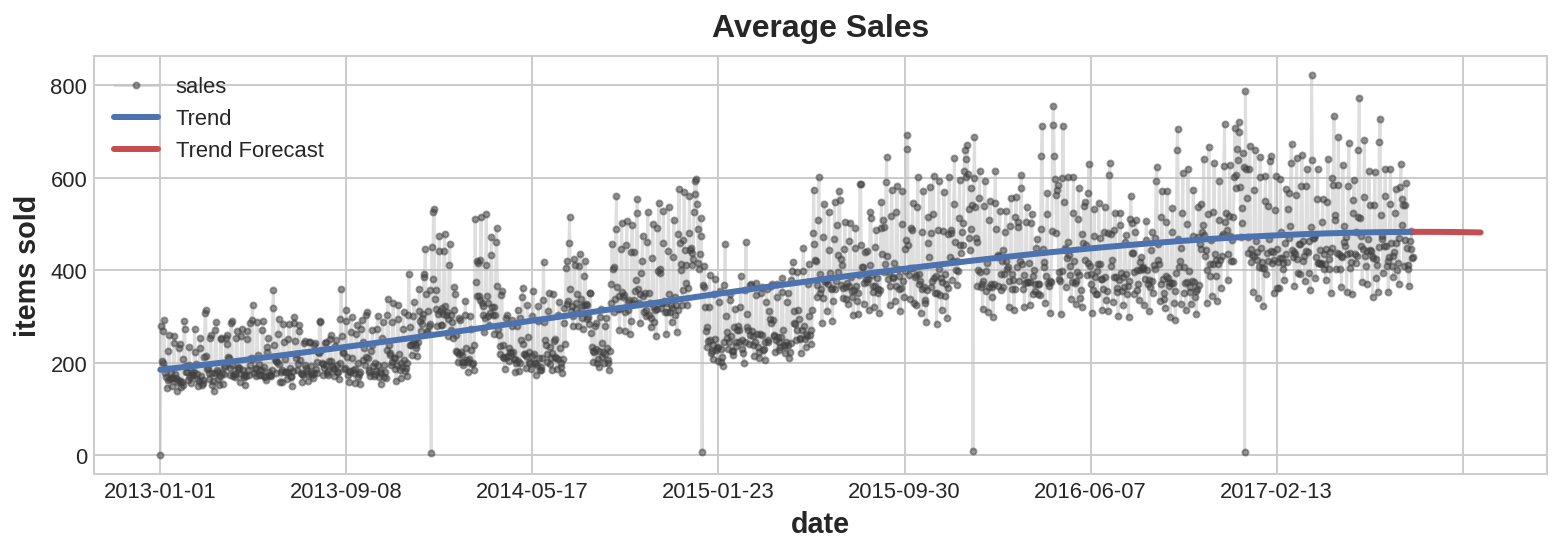

In [ ]:
ax = y.plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();

In [ ]:
# National and regional holidays in the training set
holidays_events2 = holidays_events.copy()
holidays_events2 = holidays_events2.set_index('date') #.to_period('D')
holidays_events2
holidays = (
    holidays_events2
    .query("locale in ['National', 'Regional']")
    .loc['2017':'2017-12-31', ['description']]
    #.assign(description=lambda x: x.description.cat.remove_unused_categories())
)
#holidays=holidays[['date','description']]
display(holidays)

,description
date,
2017-01-01,Primer dia del ano
2017-01-02,Traslado Primer dia del ano
2017-02-27,Carnaval
2017-02-28,Carnaval
2017-04-01,Provincializacion de Cotopaxi
2017-04-14,Viernes Santo
2017-05-01,Dia del Trabajo
2017-05-13,Dia de la Madre-1
2017-05-14,Dia de la Madre


In [ ]:
from sklearn.preprocessing import OneHotEncoder
print(holidays.shape)
ohe = OneHotEncoder(sparse=False)
#print(ohe.fit_transform(holidays))
#print(holidays.index)
X_holidays = pd.DataFrame(
    ohe.fit_transform(holidays),
    index=holidays.index,
    columns=holidays.description.unique(),
)

(25, 1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Join to training data
X2 = X.join(X_holidays, on='date').fillna(0.0)
print(X2)

             trend  trend_squared   trend_cubed  Primer dia del ano  \
date                                                                  
2013-01-01     1.0            1.0  1.000000e+00                 0.0   
2013-01-02     2.0            4.0  8.000000e+00                 0.0   
2013-01-03     3.0            9.0  2.700000e+01                 0.0   
2013-01-04     4.0           16.0  6.400000e+01                 0.0   
2013-01-05     5.0           25.0  1.250000e+02                 0.0   
...            ...            ...           ...                 ...   
2017-08-11  1680.0      2822400.0  4.741632e+09                 0.0   
2017-08-12  1681.0      2825761.0  4.750104e+09                 0.0   
2017-08-13  1682.0      2829124.0  4.758587e+09                 0.0   
2017-08-14  1683.0      2832489.0  4.767079e+09                 0.0   
2017-08-15  1684.0      2835856.0  4.775582e+09                 0.0   

            Traslado Primer dia del ano  Carnaval  \
date                   

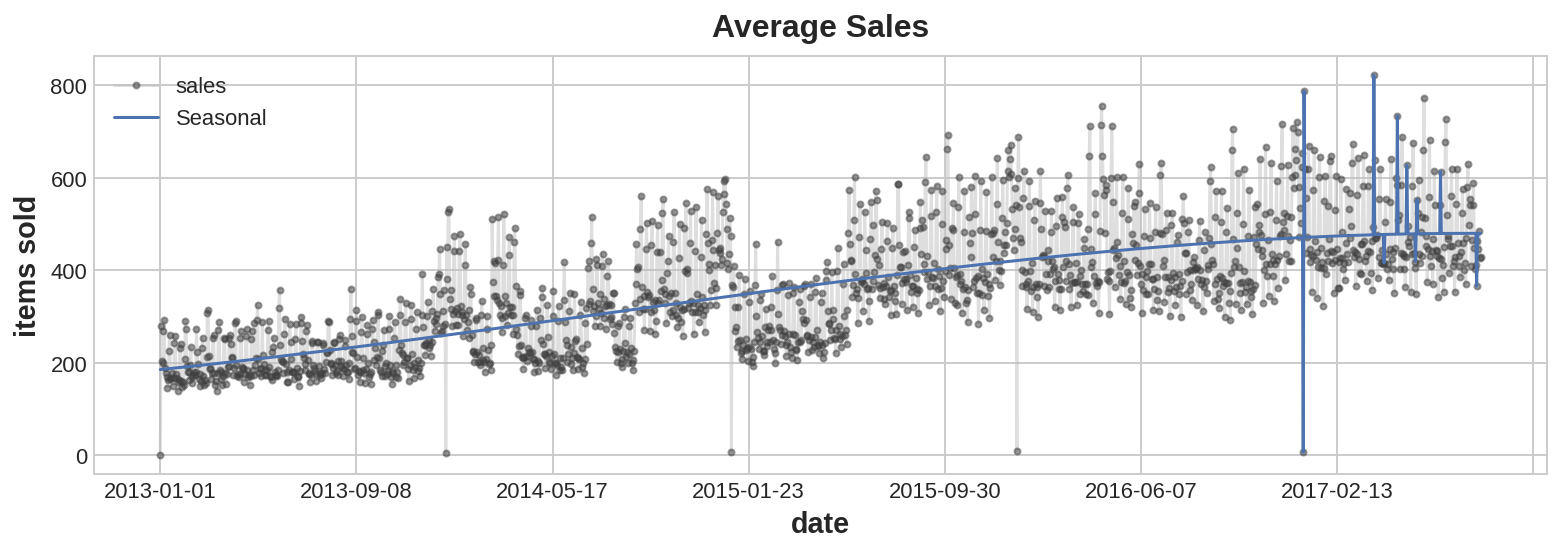

In [ ]:
model = LinearRegression().fit(X2, y)
y_pred = pd.Series(
    model.predict(X2),
    index=X2.index,
    name='Fitted',
)

y_pred = pd.Series(model.predict(X2), index=X2.index)
ax = y.plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax.legend();

In [ ]:

from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
store_sales = pd.read_csv(
        "/content/drive/MyDrive/sales_timeseries/store-sales-time-series-forecasting/train.csv",
        usecols=["store_nbr", "family", "date", "sales"],
        dtype={
            "store_nbr": "category",
            "familiy": "category",
            "sales": "float32",
        },
        parse_dates=['date'],
        infer_datetime_format=True,
)
#print(store_sales)
store_sales['date'] = store_sales.date.dt.to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()

average_sales = (
    store_sales.groupby('date').mean().squeeze().loc['2017']
)
y = store_sales.unstack(['store_nbr', 'family']).loc['2017']

# Create Training Data
fourier = CalendarFourier(freq="M", order=4)

dp = DeterministicProcess(
    index=y.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X = dp.in_sample()
X['NewYear'] = (X.index.dayofyear == 1)

model = LinearRegression(fit_intercept=False)
model.fit(X,y)
y_pred = pd.DataFrame(model.predict(X), index=X.index, columns=y.columns)

Index(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY', 'PREPARED FOODS',
       'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD'],
      dtype='object', name='family')

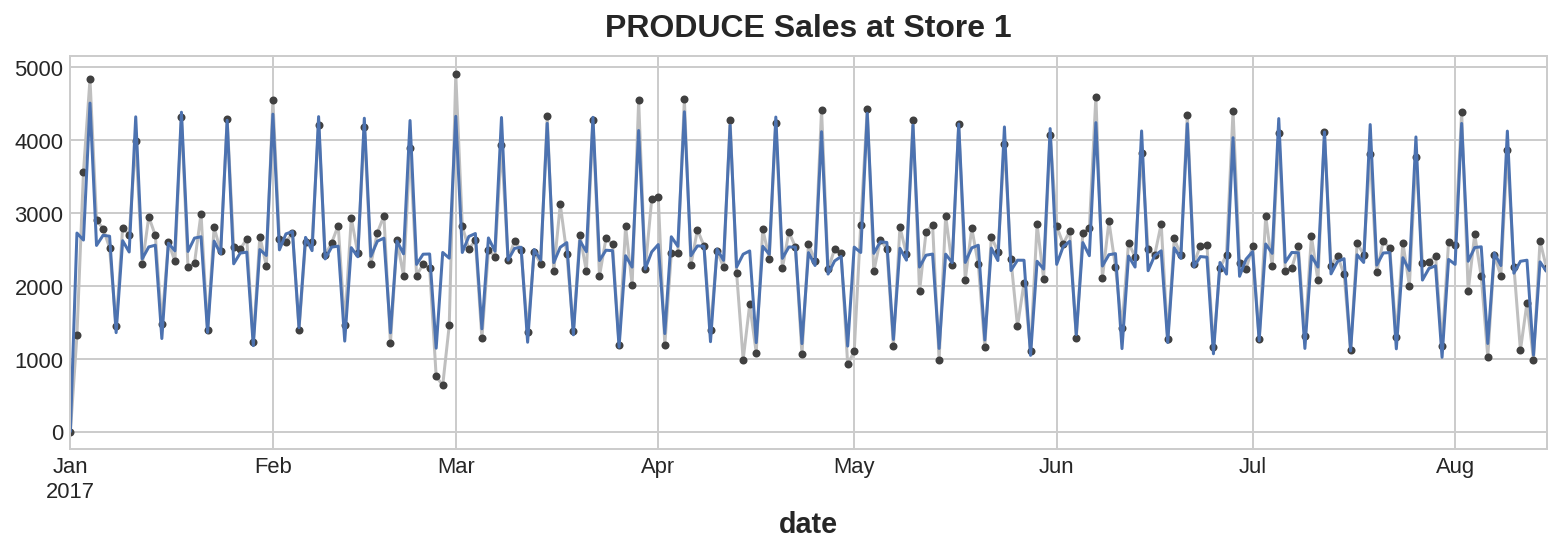

In [ ]:
STORE_NBR = '1'  # 1 - 54
FAMILY = 'PRODUCE'
# Uncomment to see a list of product families
display(store_sales.index.get_level_values('family').unique())

ax = y.loc(axis=1)['sales', STORE_NBR, FAMILY].plot(**plot_params)
ax = y_pred.loc(axis=1)['sales', STORE_NBR, FAMILY].plot(ax=ax)
ax.set_title(f'{FAMILY} Sales at Store {STORE_NBR}');

In [ ]:
#### Feature Engineering

In [ ]:
df_test = pd.read_csv(
     "/content/drive/MyDrive/sales_timeseries/store-sales-time-series-forecasting/train.csv",
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'onpromotion': 'uint32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)
df_test['date'] = df_test.date.dt.to_period('D')
df_test = df_test.set_index(['store_nbr', 'family', 'date']).sort_index()

# Create features for test set
X_test = dp.out_of_sample(steps=16)
X_test.index.name = 'date'
X_test['NewYear'] = (X_test.index.dayofyear == 1)


y_submit = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)
y_submit = y_submit.stack(['store_nbr', 'family'])
y_submit = y_submit.join(df_test.id).reindex(columns=['id', 'sales'])
y_submit.to_csv('/content/drive/MyDrive/sales_timeseries/submission.csv', index=False)

#print(df_test.head())
print(y_submit)

                                                 id        sales
date       store_nbr family                                     
2017-08-16 1         AUTOMOTIVE                 NaN     4.274030
                     BABY CARE                  NaN     0.000000
                     BEAUTY                     NaN     3.495530
                     BEVERAGES                  NaN  2414.541711
                     BOOKS                      NaN     0.438314
...                                              ..          ...
2017-08-31 9         POULTRY                    NaN   372.417153
                     PREPARED FOODS             NaN   107.843530
                     PRODUCE                    NaN  1273.316507
                     SCHOOL AND OFFICE SUPPLIES NaN    44.945937
                     SEAFOOD                    NaN    18.946715

[28512 rows x 2 columns]


In [ ]:
train1 = train.merge(oil, on = 'date', how='left')
train1 = train1.merge(holidays_events, on = 'date', how='left')
train1 = train1.merge(stores, on = 'store_nbr', how='left')
train1 = train1.merge(transactions, on = ['date', 'store_nbr'], how='left')
train1 = train1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})

test1 = test.merge(oil, on = 'date', how='left')
test1 = test1.merge(holidays_events, on = 'date', how='left')
test1 = test1.merge(stores, on = 'store_nbr', how='left')
test1 = test1.merge(transactions, on = ['date', 'store_nbr'], how='left')
test1 = test1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})
train1.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN


In [ ]:
test1.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN
1,3000889,2017-08-16,1,BABY CARE,0,46.8,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN
2,3000890,2017-08-16,1,BEAUTY,2,46.8,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,46.8,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN
4,3000892,2017-08-16,1,BOOKS,0,46.8,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN


In [ ]:
print("train predictions :",train1.columns)
print("test predictions :",test1.columns)

train predictions : Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'dcoilwtico', 'holiday_type', 'locale', 'locale_name', 'description',
       'transferred', 'city', 'state', 'store_type', 'cluster',
       'transactions'],
      dtype='object')
test predictions : Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'dcoilwtico',
       'holiday_type', 'locale', 'locale_name', 'description', 'transferred',
       'city', 'state', 'store_type', 'cluster', 'transactions'],
      dtype='object')


In [ ]:
train1["family"].value_counts()

AUTOMOTIVE                    92556
HOME APPLIANCES               92556
SCHOOL AND OFFICE SUPPLIES    92556
PRODUCE                       92556
PREPARED FOODS                92556
POULTRY                       92556
PLAYERS AND ELECTRONICS       92556
PET SUPPLIES                  92556
PERSONAL CARE                 92556
MEATS                         92556
MAGAZINES                     92556
LIQUOR,WINE,BEER              92556
LINGERIE                      92556
LAWN AND GARDEN               92556
LADIESWEAR                    92556
HOME CARE                     92556
HOME AND KITCHEN II           92556
BABY CARE                     92556
HOME AND KITCHEN I            92556
HARDWARE                      92556
GROCERY II                    92556
GROCERY I                     92556
FROZEN FOODS                  92556
EGGS                          92556
DELI                          92556
DAIRY                         92556
CLEANING                      92556
CELEBRATION                 

In [ ]:
train1["city"].value_counts()

Quito            1018116
Guayaquil         452496
Santo Domingo     169686
Cuenca            169686
Latacunga         113124
Manta             113124
Machala           113124
Ambato            113124
Quevedo            56562
Esmeraldas         56562
Loja               56562
Libertad           56562
Playas             56562
Daule              56562
Babahoyo           56562
Cayambe            56562
Salinas            56562
Puyo               56562
Guaranda           56562
Ibarra             56562
Riobamba           56562
El Carmen          56562
Name: city, dtype: int64

In [ ]:
train1["state"].value_counts()

Pichincha                         1074678
Guayas                             622182
Santo Domingo de los Tsachilas     169686
Azuay                              169686
Manabi                             169686
Cotopaxi                           113124
Tungurahua                         113124
Los Rios                           113124
El Oro                             113124
Chimborazo                          56562
Imbabura                            56562
Bolivar                             56562
Pastaza                             56562
Santa Elena                         56562
Loja                                56562
Esmeraldas                          56562
Name: state, dtype: int64

In [ ]:
train1["onpromotion"].value_counts()

0      2428528
1       178763
2        81141
3        46928
4        32453
        ...   
255          1
479          1
684          1
470          1
425          1
Name: onpromotion, Length: 362, dtype: int64

In [ ]:
train1["store_type"].value_counts()

D    1018116
C     848430
A     509058
B     452496
E     226248
Name: store_type, dtype: int64

<AxesSubplot:>

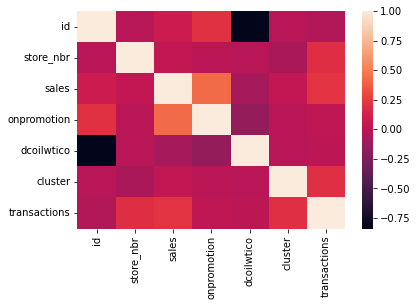

In [ ]:
import seaborn as sns
corr = train1.corr()
sns.heatmap(corr)

<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

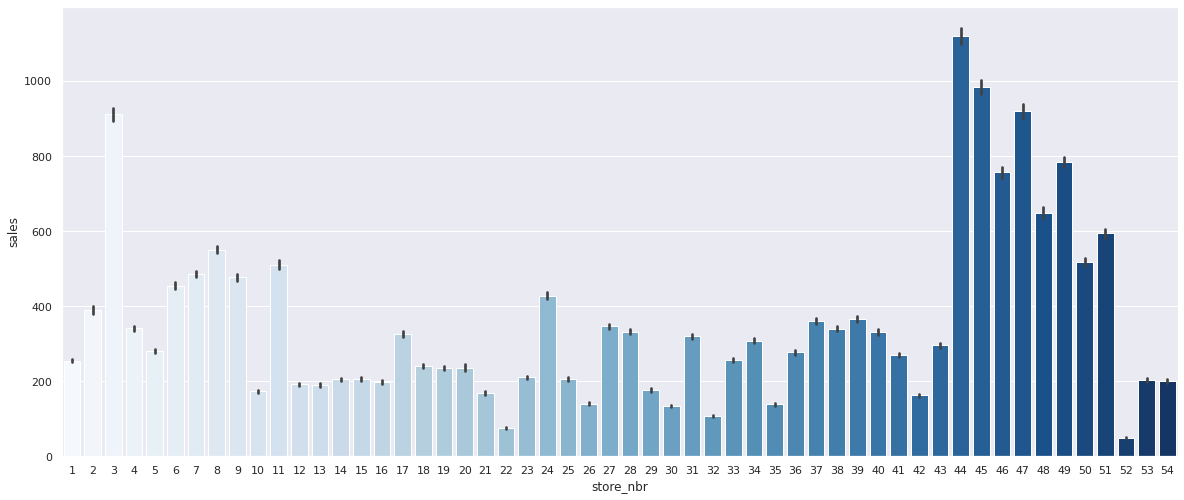

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'store_nbr',y = 'sales',data = train1,palette = "Blues")

<AxesSubplot:xlabel='store_nbr', ylabel='transactions'>

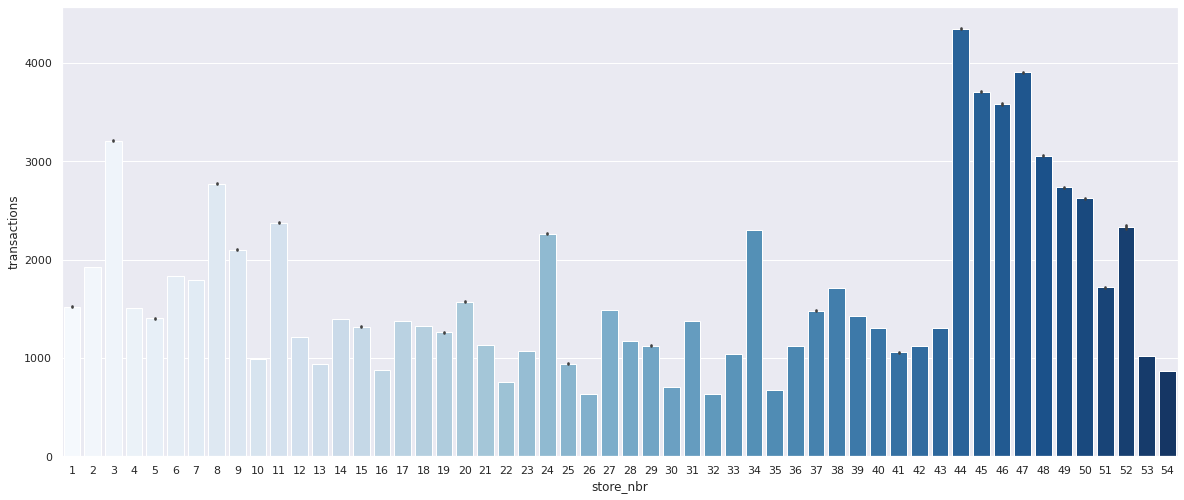

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'store_nbr',y = 'transactions',data = train1,palette = "Blues")

<AxesSubplot:xlabel='transactions', ylabel='sales'>

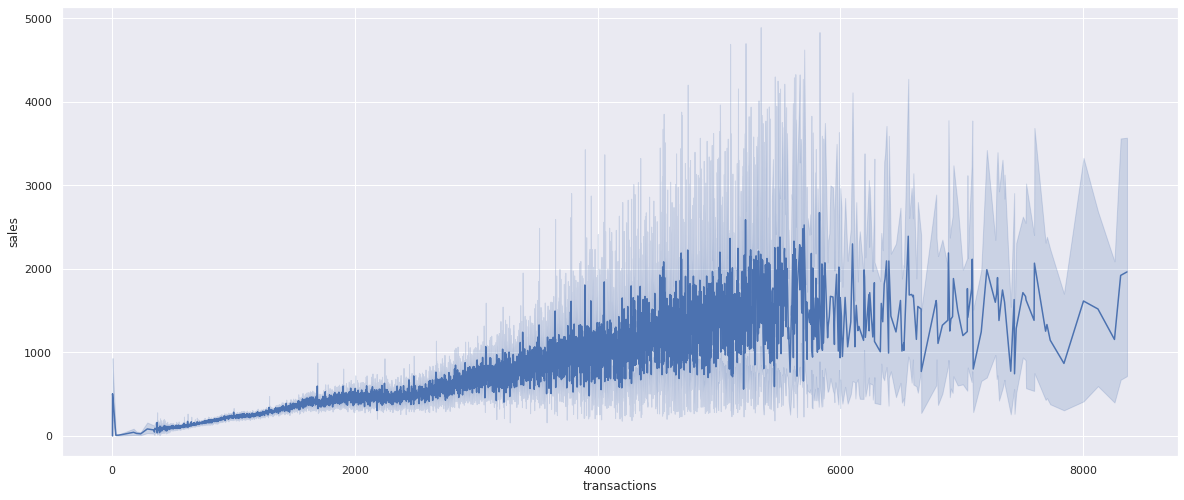

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.lineplot(x = "transactions",y = 'sales',data = train1,palette = "Blues")

<AxesSubplot:xlabel='onpromotion', ylabel='sales'>

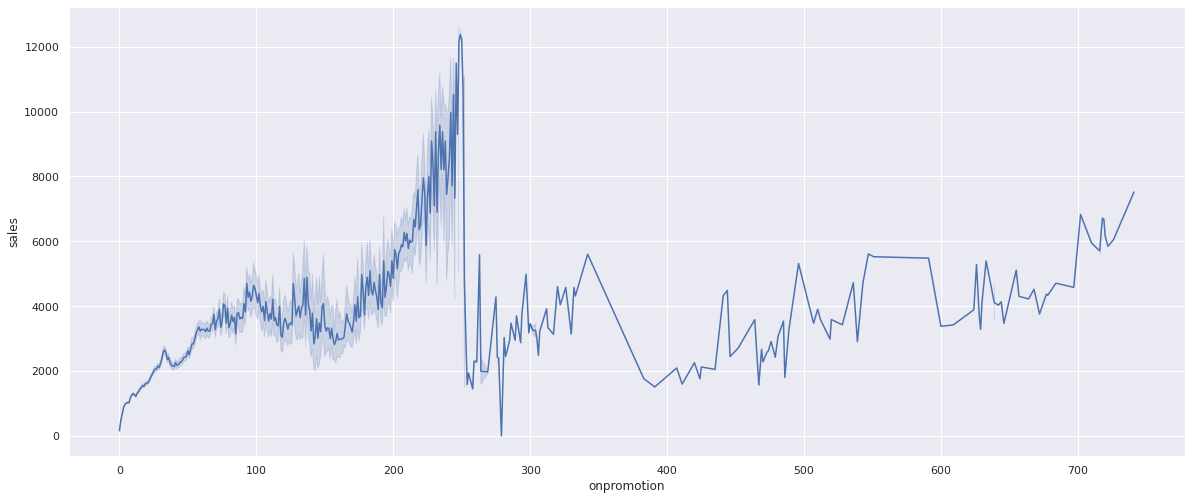

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.lineplot(x = "onpromotion",y = 'sales',data = train1,palette = "Blues")

<AxesSubplot:xlabel='cluster', ylabel='transactions'>

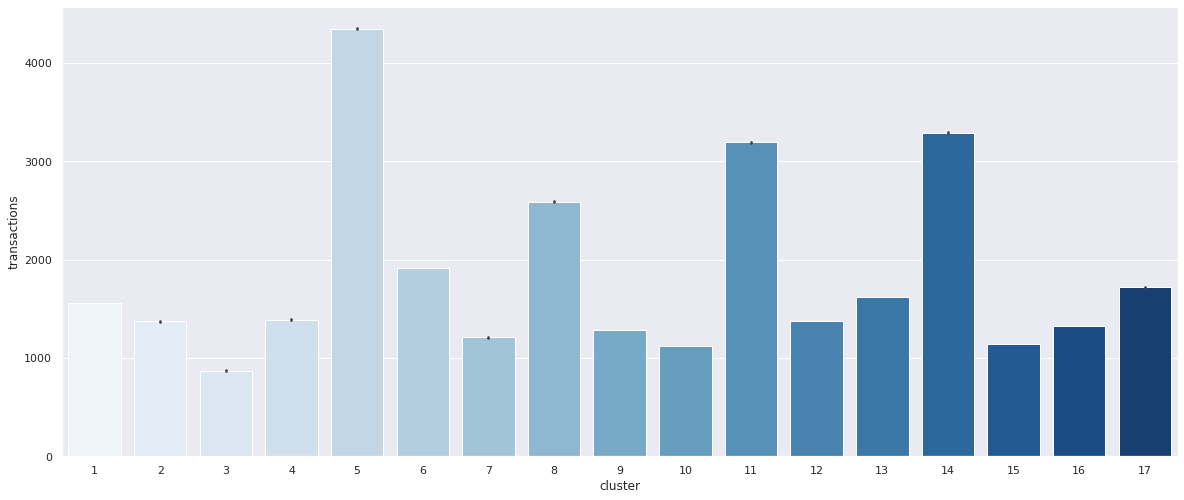

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'cluster',y = 'transactions',data = train1,palette = "Blues")

In [ ]:
from sklearn.model_selection import train_test_split
features=['date','store_nbr','family','onpromotion','dcoilwtico','holiday_type','locale','locale_name','description','transferred','city','state','store_type','cluster','transactions']
X=train1[features]
y=train1.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

Feature: 0, Score: 0.00000


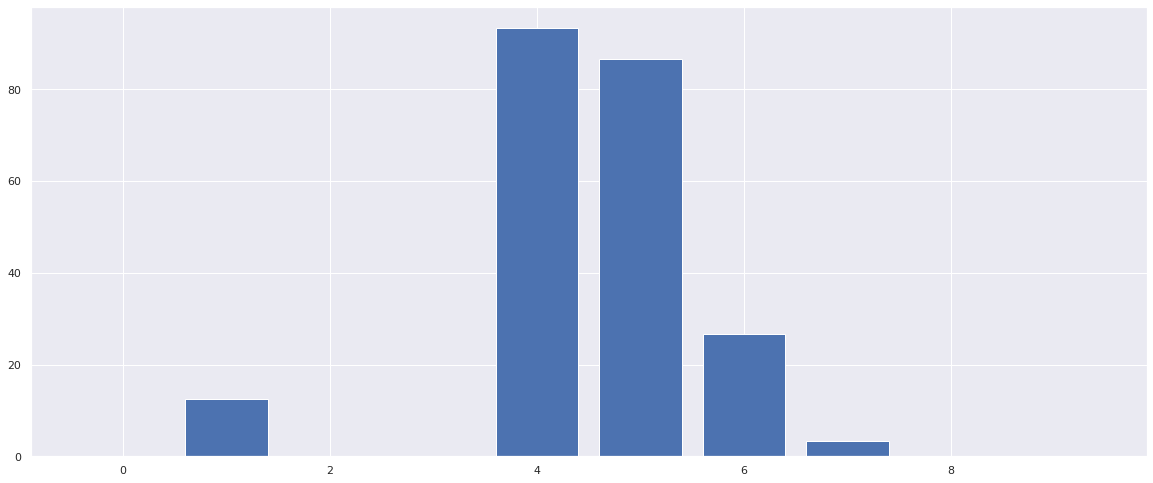

Feature: 1, Score: 12.44483


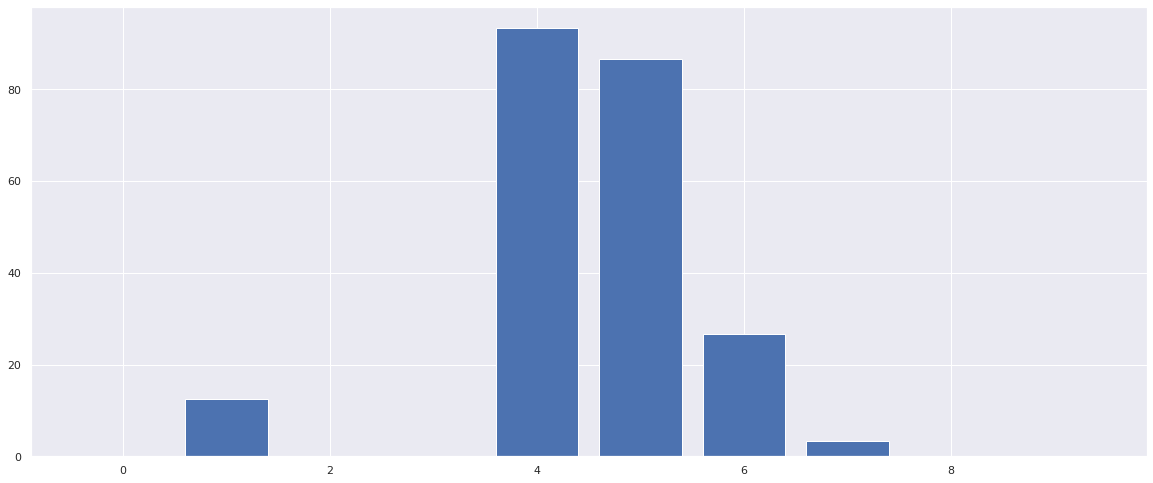

Feature: 2, Score: -0.00000


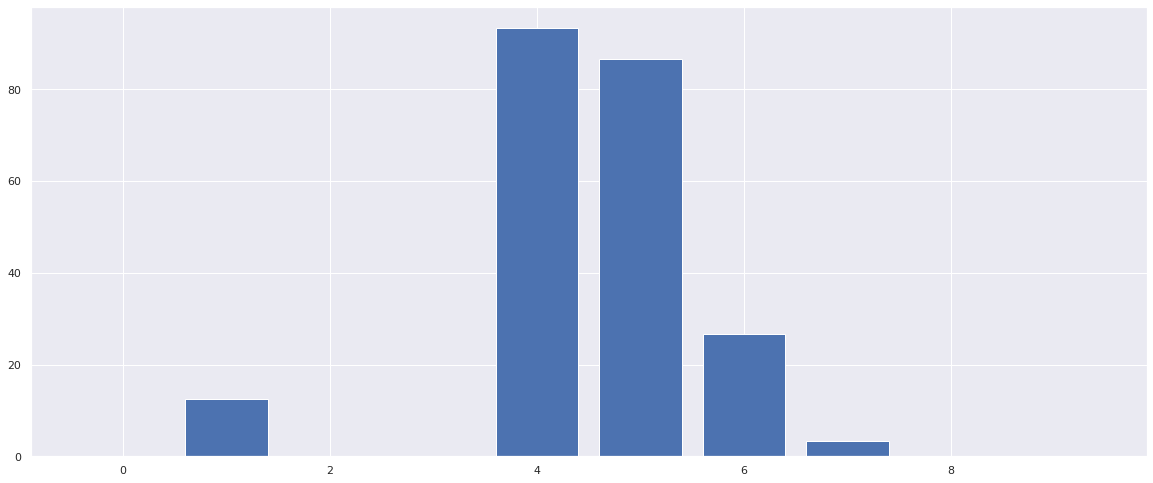

Feature: 3, Score: -0.00000


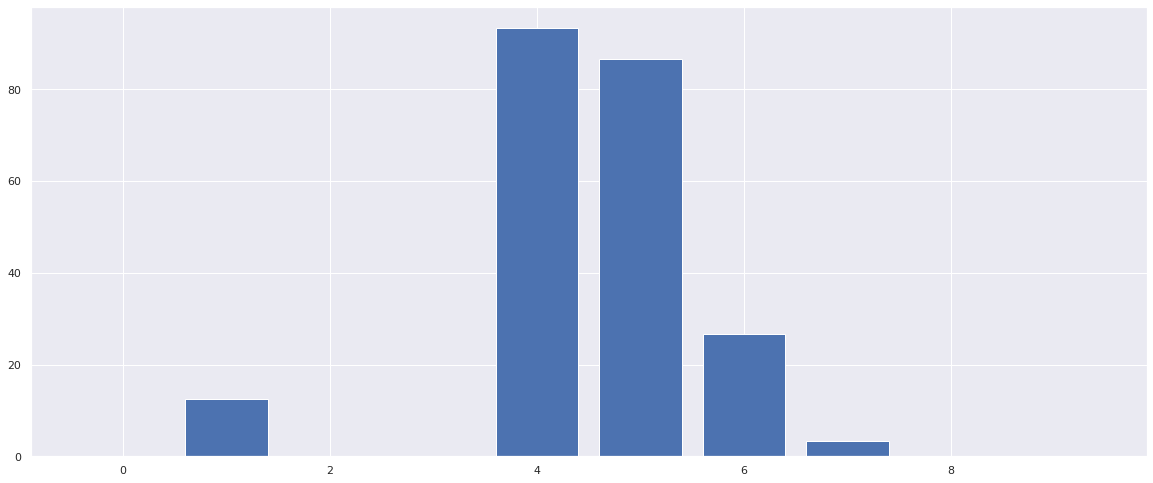

Feature: 4, Score: 93.32225


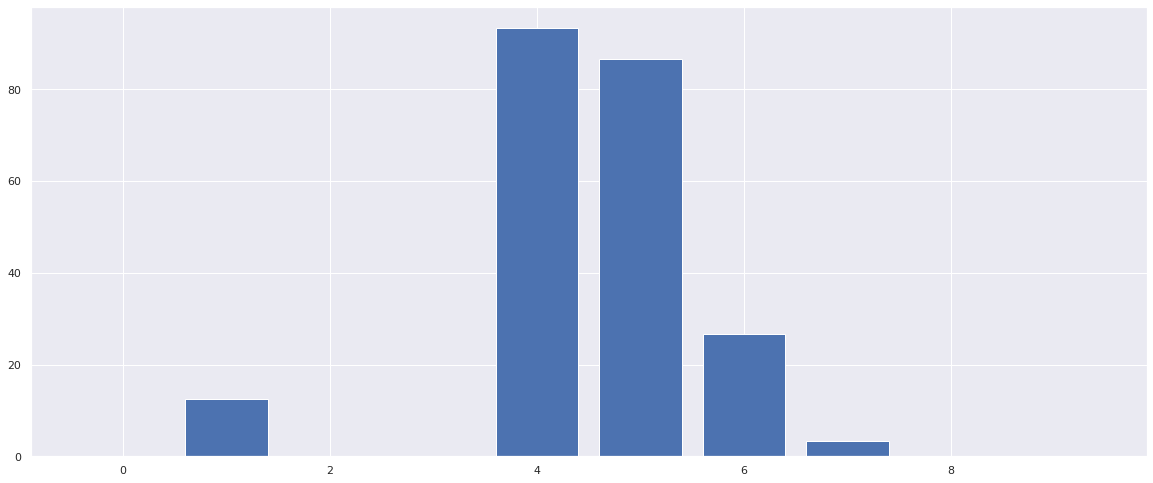

Feature: 5, Score: 86.50811


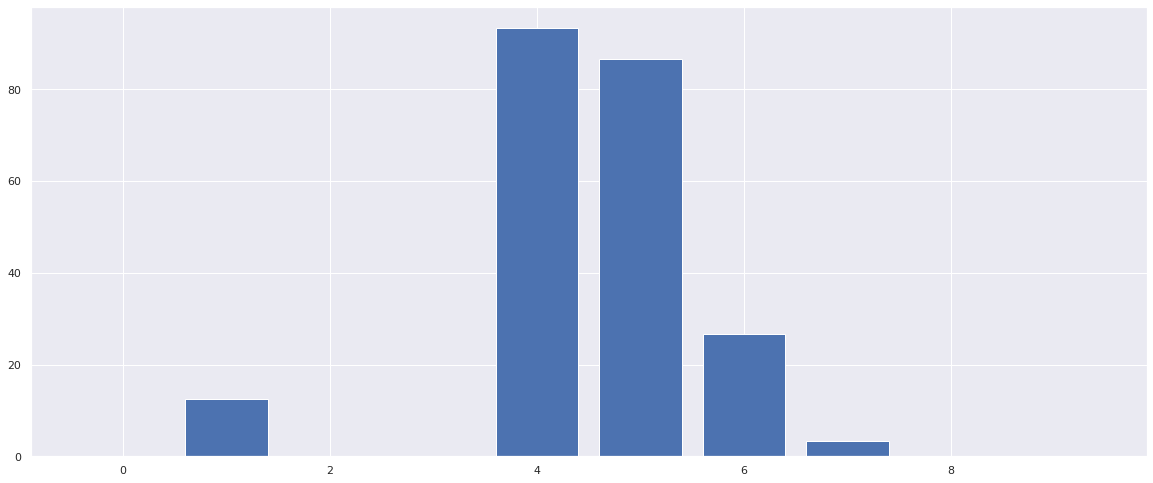

Feature: 6, Score: 26.74607


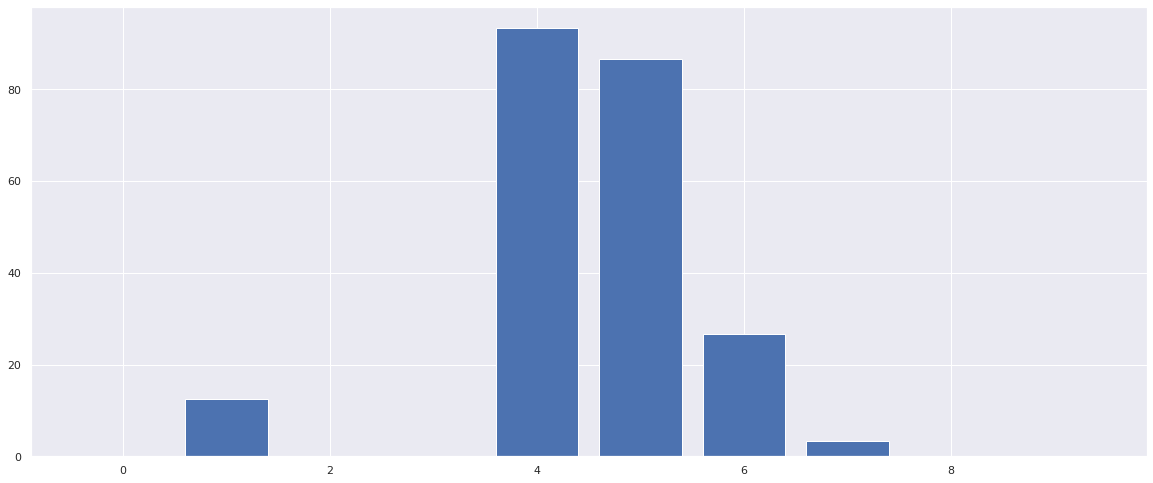

Feature: 7, Score: 3.28535


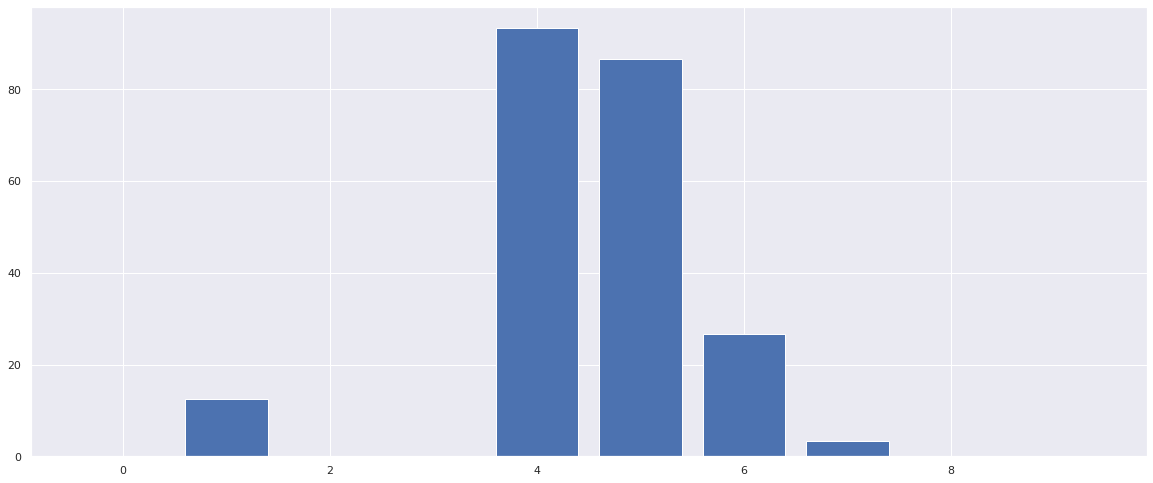

Feature: 8, Score: -0.00000


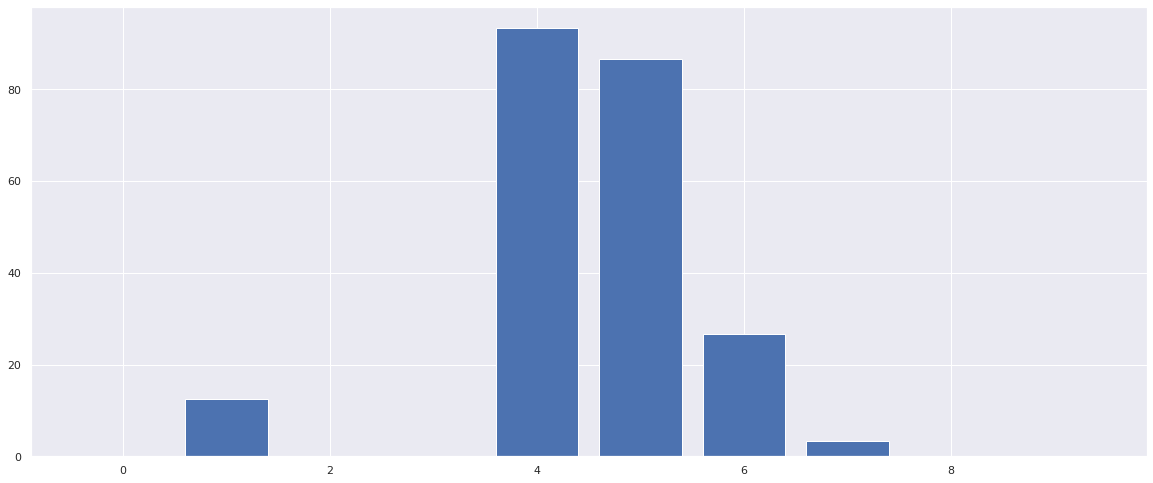

Feature: 9, Score: 0.00000


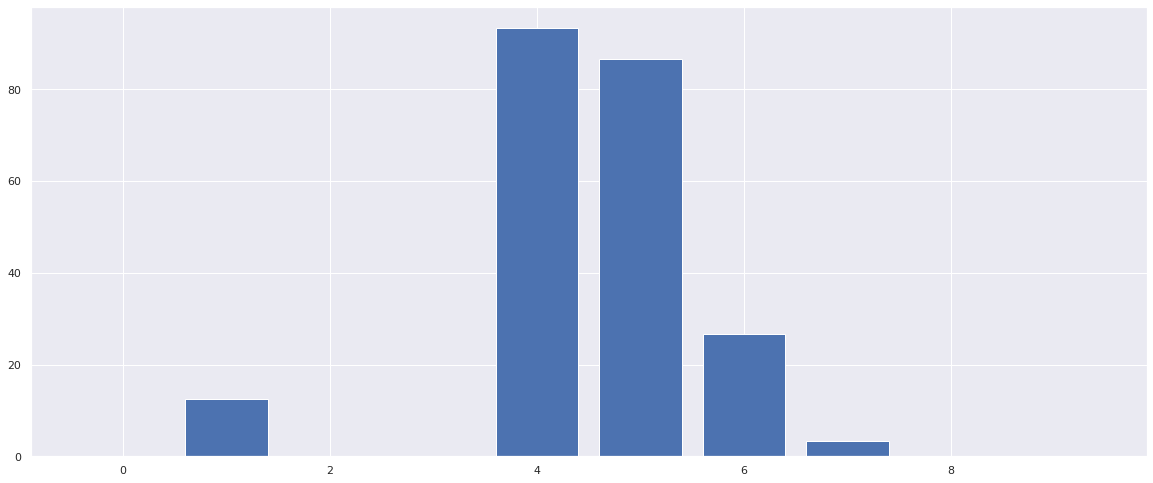

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

In [ ]:
def feature_eng(data):
    data['date'] = pd.to_datetime(data['date'])
    data['dayofweek'] = data['date'].dt.dayofweek
    data['quarter'] = data['date'].dt.quarter
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayofyear'] = data['date'].dt.dayofyear
    data['dayofmonth'] = data['date'].dt.day
    return data
    
train1 = feature_eng(train1)
test1 = feature_eng(test1)
train1.head()


,id,date,store_nbr,family,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,...,state,store_type,cluster,transactions,dayofweek,quarter,month,year,dayofyear,dayofmonth
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,NaN,NaN,NaN,NaN,...,Pichincha,D,13,NaN,2,3,8,2017,228,16
1,3000889,2017-08-16,1,BABY CARE,0,46.8,NaN,NaN,NaN,NaN,...,Pichincha,D,13,NaN,2,3,8,2017,228,16
2,3000890,2017-08-16,1,BEAUTY,2,46.8,NaN,NaN,NaN,NaN,...,Pichincha,D,13,NaN,2,3,8,2017,228,16
3,3000891,2017-08-16,1,BEVERAGES,20,46.8,NaN,NaN,NaN,NaN,...,Pichincha,D,13,NaN,2,3,8,2017,228,16
4,3000892,2017-08-16,1,BOOKS,0,46.8,NaN,NaN,NaN,NaN,...,Pichincha,D,13,NaN,2,3,8,2017,228,16


In [ ]:
test1.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,...,state,store_type,cluster,transactions,dayofweek,quarter,month,year,dayofyear,dayofmonth
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,NaN,NaN,NaN,NaN,...,Pichincha,D,13,NaN,2,3,8,2017,228,16
1,3000889,2017-08-16,1,BABY CARE,0,46.8,NaN,NaN,NaN,NaN,...,Pichincha,D,13,NaN,2,3,8,2017,228,16
2,3000890,2017-08-16,1,BEAUTY,2,46.8,NaN,NaN,NaN,NaN,...,Pichincha,D,13,NaN,2,3,8,2017,228,16
3,3000891,2017-08-16,1,BEVERAGES,20,46.8,NaN,NaN,NaN,NaN,...,Pichincha,D,13,NaN,2,3,8,2017,228,16
4,3000892,2017-08-16,1,BOOKS,0,46.8,NaN,NaN,NaN,NaN,...,Pichincha,D,13,NaN,2,3,8,2017,228,16
